### Introduction

The aim of this case study is to predict the price of AirBnB listings in major U.S. cities.

### Problem Statement
Given a dataset with 24 variables such as number of bedrooms and a log-price indicator (greater than 0) for each observation in the training data, the objective is to suggest the log-price of a particular listing using the 24 features provided.

In [1]:
import random
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("train.csv", parse_dates=['first_review', 'last_review','host_since'])  # reading the train file

In [3]:
data.head(2)

,id,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,...,instant_bookable,last_review,name,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price
0,6901257,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,2016-06-18,...,f,2016-07-18,Beautiful brownstone 1-bedroom,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,5.010635
1,6304928,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,2017-08-05,...,t,2017-09-23,Superb 3BR Apt Located Near Times Square,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,5.129899


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47499 entries, 0 to 47498
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      47499 non-null  int64         
 1   property_type           47499 non-null  object        
 2   room_type               47499 non-null  object        
 3   accommodates            47499 non-null  int64         
 4   bathrooms               47360 non-null  float64       
 5   bed_type                47499 non-null  object        
 6   cancellation_policy     47499 non-null  object        
 7   cleaning_fee            47499 non-null  bool          
 8   city                    47499 non-null  object        
 9   first_review            37306 non-null  datetime64[ns]
 10  host_has_profile_pic    47377 non-null  object        
 11  host_identity_verified  47377 non-null  object        
 12  host_since              47377 non-null  dateti

In [4]:
data.isna().sum()

id                            0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                   139
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              10193
host_has_profile_pic        122
host_identity_verified      122
host_since                  122
instant_bookable              0
last_review               10167
name                          0
number_of_reviews             0
review_scores_rating      10763
thumbnail_url              5342
zipcode                     608
bedrooms                     60
beds                         85
log_price                     0
dtype: int64

In [3]:
# Extracting month and year from date columns  and removing the original columns from the dataframe

def dates_split(df):
    # For first review
    df["first_review_Year"] = df.first_review.dt.year
    df["first_review_Month"] = df.first_review.dt.month

    # For last review
    df["last_review_Year"] = df.last_review.dt.year
    df["last_review_Month"] = df.last_review.dt.month

    # For host_since
    df["host_since_Year"] = df.host_since.dt.year
    df["host_since_Month"] = df.host_since.dt.month
    
    # Removing original columns
    df.drop(["first_review", "host_since", "last_review"], axis=1, inplace= True)
    
dates_split(data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47499 entries, 0 to 47498
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      47499 non-null  int64  
 1   property_type           47499 non-null  object 
 2   room_type               47499 non-null  object 
 3   accommodates            47499 non-null  int64  
 4   bathrooms               47360 non-null  float64
 5   bed_type                47499 non-null  object 
 6   cancellation_policy     47499 non-null  object 
 7   cleaning_fee            47499 non-null  bool   
 8   city                    47499 non-null  object 
 9   host_has_profile_pic    47377 non-null  object 
 10  host_identity_verified  47377 non-null  object 
 11  instant_bookable        47499 non-null  object 
 12  name                    47499 non-null  object 
 13  number_of_reviews       47499 non-null  int64  
 14  review_scores_rating    36736 non-null

In [92]:
data.head(2).T

,0,1
id,6901257,6304928
property_type,Apartment,Apartment
room_type,Entire home/apt,Entire home/apt
accommodates,3,7
bathrooms,1,1
bed_type,Real Bed,Real Bed
cancellation_policy,strict,strict
cleaning_fee,True,True
city,NYC,NYC
host_has_profile_pic,t,t


# EDA

In [124]:
prop = data[["property_type", "log_price"]].groupby("property_type", as_index=False).mean().sort_values(by="log_price", ascending=False)

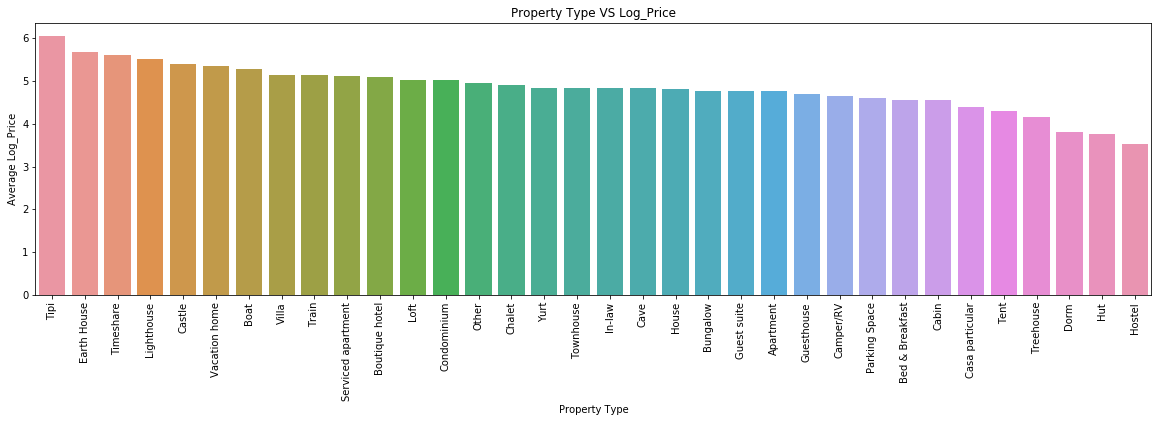

In [149]:
# Price_Log VS Property_Type
plt.figure(figsize =(20,5))
sns.barplot(x= "property_type", y = "log_price" , data=prop)
plt.title("Property Type VS Log_Price");
plt.xlabel("Property Type")
plt.ylabel("Average Log_Price");
plt.xticks(rotation=90);

**From the above graph, it's clear that Hostel is the cheapest option and Tipi is the costliest option taking the mean price into account**

In [9]:
room = data[["room_type", "log_price"]].groupby("room_type", as_index=False).mean().sort_values(by="log_price", ascending=False)

In [10]:
bed = data[["bed_type", "log_price"]].groupby("bed_type", as_index=False).mean().sort_values(by="log_price", ascending=False)

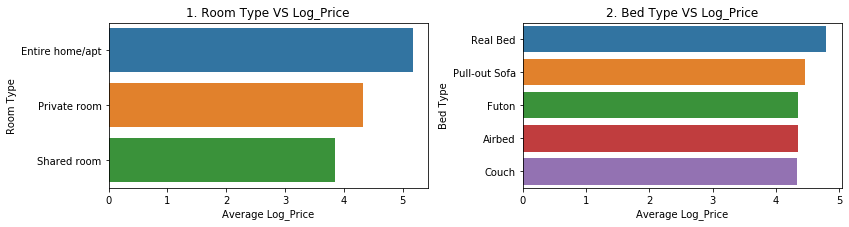

In [11]:
fig, ax = plt.subplots(nrows=2, ncols = 2, figsize =(12,6))

# For Room Type Vs Mean Price log
sns.barplot(y= "room_type", x = "log_price" , data=room, ax=ax[0,0], orient='h')
ax[0,0].set_title("1. Room Type VS Log_Price");
ax[0,0].set_ylabel("Room Type")
ax[0,0].set_xlabel("Average Log_Price");

# For Bed Type Vs Mean Price log
sns.barplot(y= "bed_type", x = "log_price" , data=bed, ax=ax[0,1] ,orient='h')
ax[0,1].set_title("2. Bed Type VS Log_Price");
ax[0,1].set_ylabel("Bed Type")
ax[0,1].set_xlabel("Average Log_Price");
# ax[0,1].set_ylabel("Average Log_Price");

fig.tight_layout();
fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])

**1. Comparing the average price_log and Room type, it is clear that shared rooms are cheapest, then private rooms are costlier and entire home/apt is the costliest option**

**2. Comparing the average price_log and Bed type, the Real Bed availability is costliest while Futon, Airbed and Couch are cheapest options.**

In [178]:
data.city.value_counts()

NYC        20723
LA         14409
SF          4127
DC          3621
Chicago     2394
Boston      2225
Name: city, dtype: int64

<Figure size 360x360 with 0 Axes>

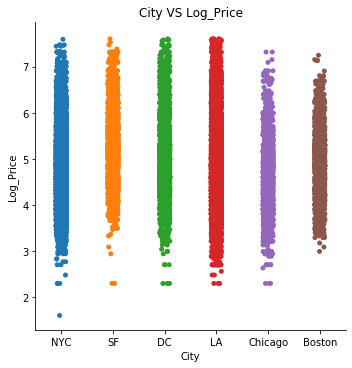

In [180]:
# Price_Log VS City
plt.figure(figsize =(5,5))
sns.catplot(x="city", y= "log_price", data= data )
plt.title("City VS Log_Price");
plt.xlabel("City")
plt.ylabel("Log_Price");

**From the above grpah, NYC has some of the cheapest and costliest AirBnBs, while the price range in Boston is narrowest among the 6 given cities**

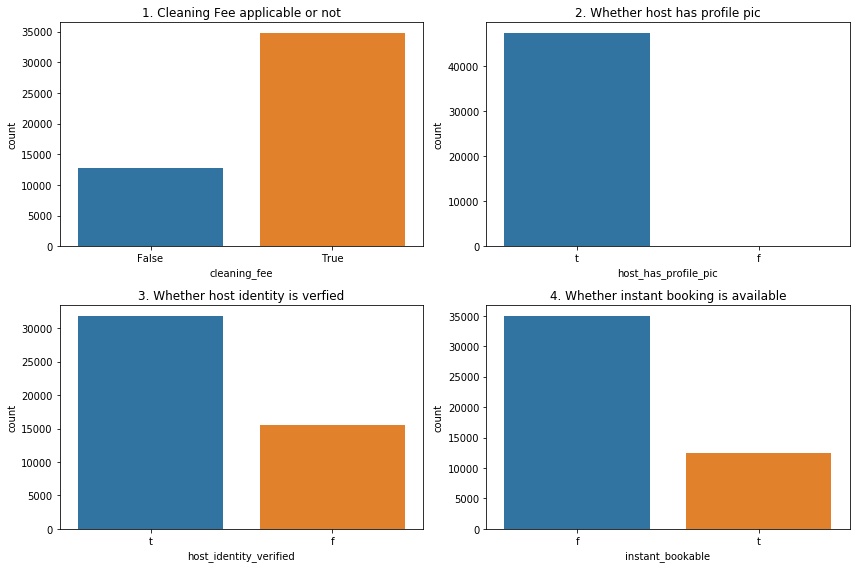

In [19]:
fig, ax = plt.subplots(nrows=2, ncols = 2, figsize =(12,8))

# Cleaning fee applicable or not
sns.countplot(data.cleaning_fee, ax=ax[0,0] )
ax[0,0].set_title("1. Cleaning Fee applicable or not");

# Whether host has profile pic or not
sns.countplot(data.host_has_profile_pic, ax=ax[0,1])
ax[0,1].set_title("2. Whether host has profile pic");

# Whether host identity is verfied or not
sns.countplot(data.host_identity_verified, ax=ax[1,0])
ax[1,0].set_title("3. Whether host identity is verfied");

# Whether instant booking is avaialble
sns.countplot(data.instant_bookable, ax=ax[1,1])
ax[1,1].set_title("4. Whether instant booking is available");

plt.tight_layout()

**1. In about 3/4th of the AirBnbs, cleaning fee is appliable.**

**2. Almost all the hosts have their profile picture set up.**

**3. Around 2/3rd of AirBnbs have their hosts verified.**

**4. In about 3/4th of the AirBnbs, isntant booking is available.**


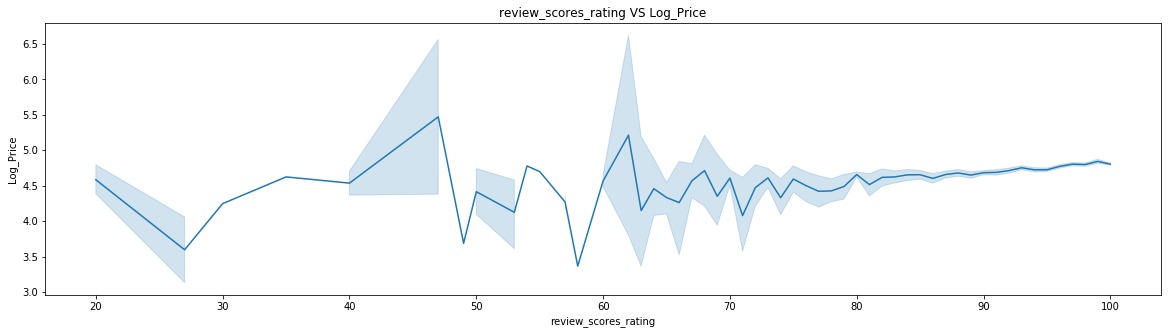

In [30]:
# Price_Log VS review_scores_rating
plt.figure(figsize =(20,5))
sns.lineplot(x="review_scores_rating", y= "log_price", data=data )
plt.title("review_scores_rating VS Log_Price");
plt.xlabel("review_scores_rating")
plt.ylabel("Log_Price");

**From the above graph, we can see that a 100% review score rating does not necesarily mean it will cost more**

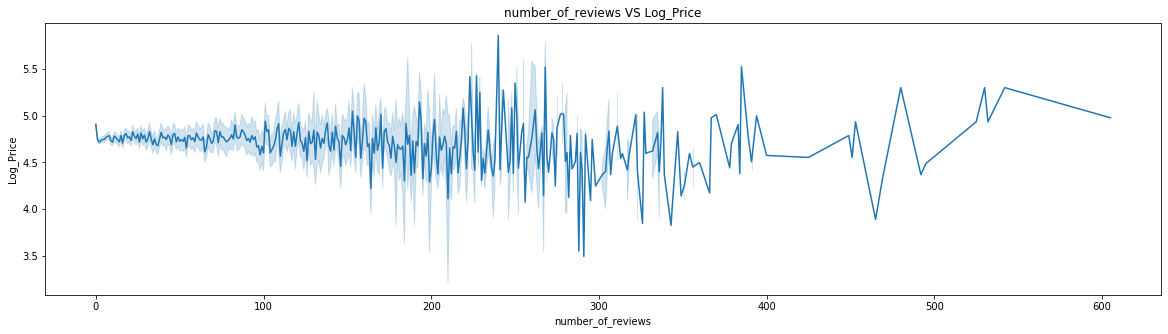

In [31]:
# number_of_reviews VS review_scores_rating
plt.figure(figsize =(20,5))
sns.lineplot(x="number_of_reviews", y= "log_price", data=data )
plt.title("number_of_reviews VS Log_Price");
plt.xlabel("number_of_reviews")
plt.ylabel("Log_Price");

**From the above graph, we can see that increasing number of reviews have no general increasing trend on the price**

In [34]:
acc = data[["accommodates", "log_price"]].groupby("accommodates", as_index=False).mean()
bathrooms = data[["bathrooms", "log_price"]].groupby("bathrooms", as_index=False).mean()
bedrooms = data[["bedrooms", "log_price"]].groupby("bedrooms", as_index=False).mean()
bed_num = data[["beds", "log_price"]].groupby("beds", as_index=False).mean()

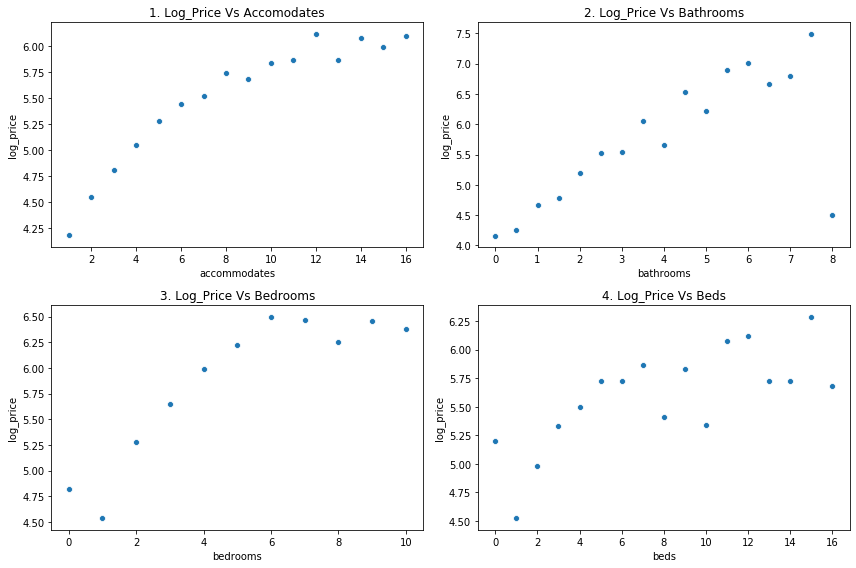

In [39]:
fig, ax = plt.subplots(nrows=2, ncols = 2, figsize =(12,8))

sns.scatterplot(x= "accommodates", y = "log_price" , data=acc, ax=ax[0,0]);
ax[0,0].set_title("1. Log_Price Vs Accomodates");

sns.scatterplot(x= "bathrooms", y = "log_price" , data=bathrooms, ax=ax[0,1]);
ax[0,1].set_title("2. Log_Price Vs Bathrooms");

sns.scatterplot(x= "bedrooms", y = "log_price" , data=bedrooms, ax=ax[1,0]);
ax[1,0].set_title("3. Log_Price Vs Bedrooms");

sns.scatterplot(x= "beds", y = "log_price" , data=bed_num, ax=ax[1,1]);
ax[1,1].set_title("4. Log_Price Vs Beds");

fig.tight_layout();

**1. AirBnbs which can accomodate more people are highly priced.**

**2. With increasing number of bathrooms, price also increases.**

**3. With increasing number of bedrooms, price also increases.**

**4. With increasing number of beds, price fluctuates, but has general increasing trend.**

# Feature Engineering and Data Preprocessing

In [4]:
# I will remove the columns which are probably not creating any impact on the price

def rempve_cols(df):
    df.drop(["id", "name", "thumbnail_url" , "zipcode"], axis = 1, inplace= True)
    
rempve_cols(data)

In [5]:
# This will turn all of the string values into category values
def object_to_cat( df):    
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
            
object_to_cat(data)

In [6]:
data.isna().sum()

property_type                 0
room_type                     0
accommodates                  0
bathrooms                   139
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_has_profile_pic        122
host_identity_verified      122
instant_bookable              0
number_of_reviews             0
review_scores_rating      10763
bedrooms                     60
beds                         85
log_price                     0
first_review_Year         10193
first_review_Month        10193
last_review_Year          10167
last_review_Month         10167
host_since_Year             122
host_since_Month            122
dtype: int64

## Fill missing values

In [7]:
# Fill numeric rows with the median value
def fill_numeric(df):
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
            
fill_numeric(data)

In [8]:
# Fill category rows with the mode value
def fill_cat(df):
    for label, content in df.items():
        if pd.api.types.is_categorical_dtype(content):
            if pd.isnull(content).sum():
                # fill missing values with the mode
                df[label] = content.fillna(content.mode()[0])
                
fill_cat(data)

In [9]:
data.isna().sum()

property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
instant_bookable          0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
log_price                 0
first_review_Year         0
first_review_Month        0
last_review_Year          0
last_review_Month         0
host_since_Year           0
host_since_Month          0
dtype: int64

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47499 entries, 0 to 47498
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   property_type           47499 non-null  category
 1   room_type               47499 non-null  category
 2   accommodates            47499 non-null  int64   
 3   bathrooms               47499 non-null  float64 
 4   bed_type                47499 non-null  category
 5   cancellation_policy     47499 non-null  category
 6   cleaning_fee            47499 non-null  bool    
 7   city                    47499 non-null  category
 8   host_has_profile_pic    47499 non-null  category
 9   host_identity_verified  47499 non-null  category
 10  instant_bookable        47499 non-null  category
 11  number_of_reviews       47499 non-null  int64   
 12  review_scores_rating    47499 non-null  float64 
 13  bedrooms                47499 non-null  float64 
 14  beds                  

In [10]:
data.cleaning_fee = data.cleaning_fee.astype("category")  # converting boolean column to category

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47499 entries, 0 to 47498
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   property_type           47499 non-null  category
 1   room_type               47499 non-null  category
 2   accommodates            47499 non-null  int64   
 3   bathrooms               47499 non-null  float64 
 4   bed_type                47499 non-null  category
 5   cancellation_policy     47499 non-null  category
 6   cleaning_fee            47499 non-null  category
 7   city                    47499 non-null  category
 8   host_has_profile_pic    47499 non-null  category
 9   host_identity_verified  47499 non-null  category
 10  instant_bookable        47499 non-null  category
 11  number_of_reviews       47499 non-null  int64   
 12  review_scores_rating    47499 non-null  float64 
 13  bedrooms                47499 non-null  float64 
 14  beds                  

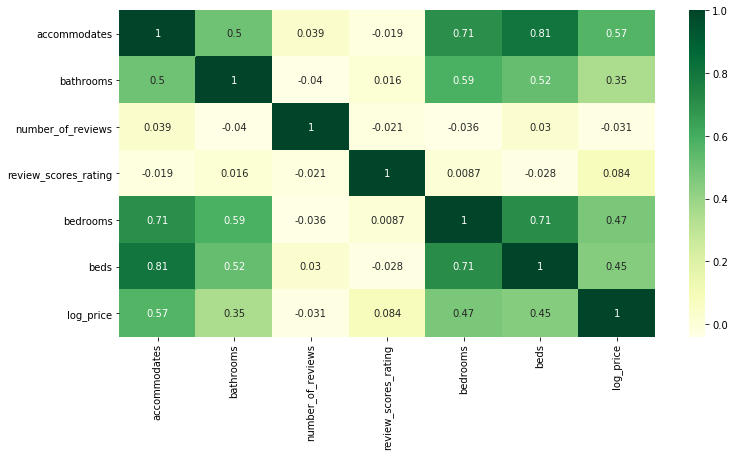

In [14]:
plt.figure(figsize= (12,6))
sns.heatmap(data.iloc[:, :16].corr(), annot= True, cmap="YlGn");

**- Seeing the correlation matrix, as "accomodates" has very high relation with "beds", and it basically is the same thing (number of beds means how many people can be accomodated), so I will remove the "beds" column.**

**- I will also remove the columns "number_of_reviews" and "review_scores_rating" as they have negligible correlation with the log_price. We have also seen this in the graphs above, that these two columns have no visible relation with the log_price.**

In [15]:
data.drop(["beds", "number_of_reviews", "review_scores_rating"], axis = 1, inplace= True)

In [16]:
data.columns

Index(['property_type', 'room_type', 'accommodates', 'bathrooms', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic',
       'host_identity_verified', 'instant_bookable', 'bedrooms', 'log_price',
       'first_review_Year', 'first_review_Month', 'last_review_Year',
       'last_review_Month', 'host_since_Year', 'host_since_Month'],
      dtype='object')

In [80]:
data.to_csv("Filled_Processed.csv", index = False)  # Saving cleaned data as csv

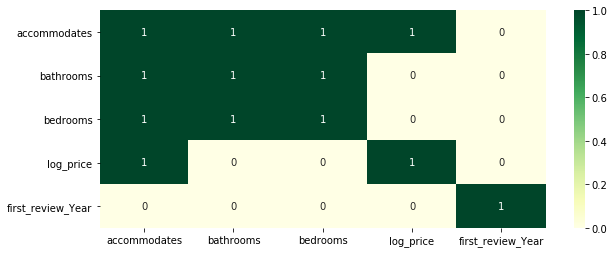

In [18]:
plt.figure(figsize= (10,4))
sns.heatmap(abs(data.iloc[:,:14].corr())>=0.5, annot= True, cmap="YlGn");

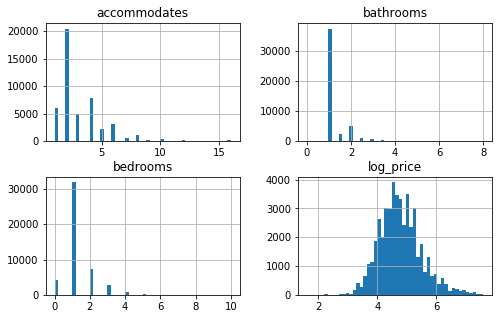

In [19]:
data[["accommodates", "bathrooms", "bedrooms", "log_price"]].hist(bins = 50, figsize=(8,5));

### Reading data from saved csv file

In [20]:
data = pd.read_csv("Filled_Processed.csv")

In [21]:
data.head(2)

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,instant_bookable,bedrooms,log_price,first_review_Year,first_review_Month,last_review_Year,last_review_Month,host_since_Year,host_since_Month
0,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,f,1.0,5.010635,2016.0,6.0,2016.0,7.0,2012.0,3.0
1,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,t,3.0,5.129899,2017.0,8.0,2017.0,9.0,2017.0,6.0


In [22]:
cat_col=["property_type", "room_type", "bed_type" , "cancellation_policy", "cleaning_fee", "city", "host_has_profile_pic",
        "host_identity_verified", "instant_bookable"]

### Data Encoding

In [23]:
# Using Label Encoding to convert categories
from sklearn import preprocessing

df_label = data.copy()

labelEncoder = preprocessing.LabelEncoder()
df_label[cat_col] = df_label[cat_col].apply(labelEncoder.fit_transform)

In [24]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47499 entries, 0 to 47498
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           47499 non-null  int32  
 1   room_type               47499 non-null  int32  
 2   accommodates            47499 non-null  int64  
 3   bathrooms               47499 non-null  float64
 4   bed_type                47499 non-null  int32  
 5   cancellation_policy     47499 non-null  int32  
 6   cleaning_fee            47499 non-null  int64  
 7   city                    47499 non-null  int32  
 8   host_has_profile_pic    47499 non-null  int32  
 9   host_identity_verified  47499 non-null  int32  
 10  instant_bookable        47499 non-null  int32  
 11  bedrooms                47499 non-null  float64
 12  log_price               47499 non-null  float64
 13  first_review_Year       47499 non-null  float64
 14  first_review_Month      47499 non-null

In [93]:
df_label.to_csv("LabelEncoded.csv", index = False)  # Saving label encoded data

In [25]:
df_LE = pd.read_csv("LabelEncoded.csv")  #Loading label encoded file

In [26]:
df_LE.head(2)

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,instant_bookable,bedrooms,log_price,first_review_Year,first_review_Month,last_review_Year,last_review_Month,host_since_Year,host_since_Month
0,0,0,3,1.0,4,2,1,4,1,1,0,1.0,5.010635,2016.0,6.0,2016.0,7.0,2012.0,3.0
1,0,0,7,1.0,4,2,1,4,1,0,1,3.0,5.129899,2017.0,8.0,2017.0,9.0,2017.0,6.0


In [13]:
# One hot encoding

df_OneHot = data.copy()

df_OneHot = pd.get_dummies(df_OneHot, columns=cat_col, prefix= cat_col, drop_first=True)

In [105]:
df_OneHot.to_csv("OneHotEncoded.csv", index = False)  # Saving one hot encoded data

In [27]:
df_OE = pd.read_csv("OneHotEncoded.csv")  #Loading one hot encoded file

In [28]:
df_OE.head(2)

,accommodates,bathrooms,bedrooms,log_price,first_review_Year,first_review_Month,last_review_Year,last_review_Month,host_since_Year,host_since_Month,...,cancellation_policy_super_strict_60,cleaning_fee_True,city_Chicago,city_DC,city_LA,city_NYC,city_SF,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,3,1.0,1.0,5.010635,2016.0,6.0,2016.0,7.0,2012.0,3.0,...,0,1,0,0,0,1,0,1,1,0
1,7,1.0,3.0,5.129899,2017.0,8.0,2017.0,9.0,2017.0,6.0,...,0,1,0,0,0,1,0,1,0,1


In [29]:
df_LE_Y = df_LE.log_price
df_LE_X = df_LE.drop("log_price", axis = 1)

df_OE_Y = df_OE.log_price
df_OE_X = df_OE.drop("log_price", axis = 1)

### Normalizing the data

In [17]:
# Normalizing Label Encoded - only predictors

scaler = preprocessing.MinMaxScaler()
df_LE_X_norm = scaler.fit_transform(df_LE_X)

In [18]:
# Normalizing One hot Encoded - only predictors

scaler1 = preprocessing.MinMaxScaler()
df_OE_X_norm = scaler1.fit_transform(df_OE_X)

### Splitting train data into train and validation set

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Dividing Label encoded data into train and  validations sets
X_train_LE, X_val_LE, y_train_LE, y_val_LE = train_test_split(df_LE_X_norm, df_LE_Y, test_size = 0.3, random_state=1 )

In [32]:
# Dividing One hot encoded data into train and  validations sets
X_train_OE, X_val_OE, y_train_OE, y_val_OE = train_test_split(df_OE_X_norm, df_OE_Y, test_size = 0.3, random_state=1 )

### Training and Predicitng

In [33]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.model_selection import  GridSearchCV

### - Linear Regression Model

In [34]:
# Linear Regression model

def linear_model(X_train , y_train, X_val, y_val, encoding=""):
    model = LR()   #inititlaizing the model
    model.fit(X_train, y_train)   #fit the train data
    y_pred = model.predict(X_val)   # predict on validation data
    mean_sq_err = mse(y_val, y_pred) 
    rmse = np.sqrt(mean_sq_err)
    score = model.score(X_val, y_val)
    print("Linear Regression model result----")
    print(encoding+"----")
    print(f'Baseline model result (sum(y-ybar)^2)/n : {(np.sum((y_val - y_val.mean())**2))/len(y_val)}')
    print(f'Mean squared error : {mean_sq_err},  Root mean squared error : {rmse}  and Score : {score }'  )
    
# Linear Regression on label Encoded data to get the results
linear_model(X_train_LE, y_train_LE, X_val_LE, y_val_LE, encoding="On Label Encoded data")

Linear Regression model result----
On Label Encoded data----
Baseline model result (sum(y-ybar)^2)/n : 0.516971384941748
Mean squared error : 0.2360967507344206,  Root mean squared error : 0.48589788097337966  and Score : 0.543307893606096


In [35]:
# Linear Regression on One hot Encoded data to get the results
linear_model(X_train_OE, y_train_OE, X_val_OE, y_val_OE, encoding="On One Hot Encoded data")

Linear Regression model result----
On One Hot Encoded data----
Baseline model result (sum(y-ybar)^2)/n : 0.516971384941748
Mean squared error : 0.21929355224924862,  Root mean squared error : 0.4682878946217259  and Score : 0.575811043634536


### - KNN Regression

In [36]:
# KNN Regression model

def KNNR_model(X_train , y_train, X_val, y_val, encoding=""):
    model = KNR()   #inititlaizing the model, default neighbours=5
    model.fit(X_train, y_train)   #fit the train data
    y_pred = model.predict(X_val)   # predict on validation data
    mean_sq_err = mse(y_val, y_pred) 
    rmse = np.sqrt(mean_sq_err)
    score = model.score(X_val, y_val)
    print("KNN Regression model result----")
    print(encoding+"----")
    print(f'Baseline model result (sum(y-ybar)^2)/n : {(np.sum((y_val - y_val.mean())**2))/len(y_val)}')
    print(f'Mean squared error : {mean_sq_err},  Root mean squared error : {rmse}  and Score : {score }'  )
    
# KNN Regression on label Encoded data to get the results
KNNR_model(X_train_LE, y_train_LE, X_val_LE, y_val_LE, encoding="On Label Encoded data")

# KNN Regression on One hot Encoded data to get the results
KNNR_model(X_train_OE, y_train_OE, X_val_OE, y_val_OE, encoding="On One Hot Encoded data")

KNN Regression model result----
On Label Encoded data----
Baseline model result (sum(y-ybar)^2)/n : 0.516971384941748
Mean squared error : 0.2575515085827085,  Root mean squared error : 0.5074953286314156  and Score : 0.5018070321015364
KNN Regression model result----
On One Hot Encoded data----
Baseline model result (sum(y-ybar)^2)/n : 0.516971384941748
Mean squared error : 0.26429624898879417,  Root mean squared error : 0.5140975092225153  and Score : 0.48876039044486963


### - Decision Tree Regression model

In [136]:
# Decision Tree Regression model 
def DTR_model(X_train , y_train, X_val, y_val, encoding=""):
    model = DTR()   
    model.fit(X_train, y_train)   #fit the train data
    y_pred = model.predict(X_val)   # predict on validation data
    mean_sq_err = mse(y_val, y_pred) 
    rmse = np.sqrt(mean_sq_err)
    score = model.score(X_val, y_val)
    print("Decision Tree Regression model result----")
    print(encoding+"----")
    print(f'Mean squared error : {mean_sq_err},  Root mean squared error : {rmse}  and Score : {score }'  )
    
# Decision Tree regression on label Encoded data to get the results
DTR_model(X_train_LE, y_train_LE, X_val_LE, y_val_LE, encoding="On Label Encoded data")

# Decision Tree regression on One hot Encoded data to get the results
DTR_model(X_train_OE, y_train_OE, X_val_OE, y_val_OE, encoding="On One Hot Encoded data")

Decision Tree Regression model result----
On Label Encoded data----
Mean squared error : 0.39847596546259795,  Root mean squared error : 0.6312495270989104  and Score : 0.22921078986316024
Decision Tree Regression model result----
On One Hot Encoded data----
Mean squared error : 0.40531074215296903,  Root mean squared error : 0.6366401983483049  and Score : 0.21598998714669818


### - Random Forest Regression Model

In [137]:
# Random Forest Regression model 
def RFR_model(X_train , y_train, X_val, y_val, encoding=""):
    model = RFR()   
    model.fit(X_train, y_train)   #fit the train data
    y_pred = model.predict(X_val)   # predict on validation data
    mean_sq_err = mse(y_val, y_pred) 
    rmse = np.sqrt(mean_sq_err)
    score = model.score(X_val, y_val)
    print("Random Forest Regression model result----")
    print(encoding+"----")
    print(f'Mean squared error : {mean_sq_err},  Root mean squared error : {rmse}  and Score : {score }'  )
    
# Random Forest Regression on label Encoded data to get the results
RFR_model(X_train_LE, y_train_LE, X_val_LE, y_val_LE, encoding="On Label Encoded data")

# Random Forest Regression on One hot Encoded data to get the results
RFR_model(X_train_OE, y_train_OE, X_val_OE, y_val_OE, encoding="On One Hot Encoded data")

Random Forest Regression model result----
On Label Encoded data----
Mean squared error : 0.2115919339545847,  Root mean squared error : 0.4599912324757774  and Score : 0.5907086153744723
Random Forest Regression model result----
On One Hot Encoded data----
Mean squared error : 0.20922174944600747,  Root mean squared error : 0.45740764034502907  and Score : 0.59529336528059


In [139]:
# Random Forest regression using Grid  Search CV

# Hyperparameters dictionary
hyper_param = {'max_depth': [ None, 5, 10, 15, 20],
           'min_samples_split': np.arange(2,20,4),
           'min_samples_leaf': np.arange(1,20,4),
           'max_features': [0.5, 1 ,'sqrt', 'auto']}

gs_model = GridSearchCV(RFR(n_jobs=-1, random_state=1),
                             param_grid= hyper_param,
                             cv = 5,
                             verbose=True)

In [145]:
# Random Forest Regression model with grid Search CV , fit on Label Encoded data

LE_gs_model = gs_model
LE_gs_model.fit(X_train_LE, y_train_LE)   #fit the train data
y_pred_LE = LE_gs_model.predict(X_val_LE)   # predict on validation data
mean_sq_err = mse(y_val_LE, y_pred_LE) 
rmse = np.sqrt(mean_sq_err)
score = LE_gs_model.score(X_val_LE, y_val_LE)
print("Grid Search CV- Random Forest Regression model result on LABEL ENCODED data----")
print(f'Mean squared error : {mean_sq_err},  Root mean squared error : {rmse}  and Score : {score }'  )

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed: 48.9min finished


Grid Search CV- Random Forest Regression model result on LABEL ENCODED data----
Mean squared error : 0.1970252194428381,  Root mean squared error : 0.4438752295891697  and Score : 0.6188856381963216


In [146]:
import pickle

In [147]:
pickle.dump(LE_gs_model, open("LE_GS_RFR_model.sav", 'wb'))   # Saving the Random forest grid search cv model done on label encoded data

In [149]:
RFR_GS_LE_model = pickle.load(open('LE_GS_RFR_model.sav', 'rb'))  #loading the saved model
RFR_GS_LE_model.score(X_val_LE, y_val_LE)

0.6188856381963216

In [150]:
# Random Forest Regression model with grid Search CV , fit on ONE HOT Encoded data

OE_gs_model = gs_model
OE_gs_model.fit(X_train_OE, y_train_OE)   #fit the train data
y_pred_OE = OE_gs_model.predict(X_val_OE)   # predict on validation data
mean_sq_err = mse(y_val_OE, y_pred_OE) 
rmse = np.sqrt(mean_sq_err)
score = OE_gs_model.score(X_val_OE, y_val_OE)
print("Grid Search CV- Random Forest Regression model result on ONE HOT ENCODED data----")
print(f'Mean squared error : {mean_sq_err},  Root mean squared error : {rmse}  and Score : {score }'  )

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed: 88.9min finished


Grid Search CV- Random Forest Regression model result on ONE HOT ENCODED data----
Mean squared error : 0.1955672369194838,  Root mean squared error : 0.44222984625586254  and Score : 0.6217058765418512


In [151]:
pickle.dump(OE_gs_model, open("OE_GS_RFR_model.sav", 'wb'))   # Saving the trained Random forest grid search cv model done on One hot encoded data

In [152]:
RFR_GS_OE_model = pickle.load(open('OE_GS_RFR_model.sav', 'rb'))  #loading the saved model and checking again
RFR_GS_OE_model.score(X_val_OE, y_val_OE)

0.6217058765418512

**- We see that One hot encoded normalzied data when trained on Random Forest regressor gives the best result and lowest error.**